In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

import MAS_library as pylians_MASL
import smoothing_library as pylians_SL
%matplotlib inline


# Histogram 3d

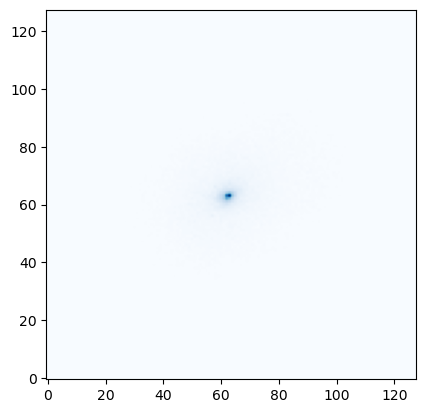

In [2]:
cutout = 'cutout_818916.hdf5'
f =  h5py.File(cutout,'r')

x = f['PartType1']['Coordinates'][:,0]
y = f['PartType1']['Coordinates'][:,1]
z = f['PartType1']['Coordinates'][:,2]

center = np.array([np.mean(x), np.mean(y), np.mean(z)]) # center of the box

x = x - center[0]
y = y - center[1]
z = z - center[2]

max_size = np.max([np.max(x) - np.min(x), np.max(y) - np.min(y), np.max(z) - np.min(z)])
max_size = max_size # size of the box (???)

grid_size = 128
pos = np.array([x, y, z]).T
hist, bins = np.histogramdd(pos, bins=grid_size, range=[[-max_size/2, max_size/2], [-max_size/2, max_size/2], [-max_size/2, max_size/2]])

plt.imshow(hist.sum(axis=2), origin='lower', cmap='Blues')

In [3]:
#test histogram: find cell with most particles, get it i,j,k and compare with a normal query to the positions

argmax = np.unravel_index(hist.argmax(), hist.shape)
i_test = argmax[0]
j_test = argmax[1]
z_test = argmax[2]

test_xmin, test_xmax = bins[0][i_test],bins[0][i_test+1]
test_ymin, test_ymax = bins[1][j_test],bins[1][j_test+1]
test_zmin, test_zmax = bins[2][z_test],bins[2][z_test+1]

test_hist = hist[i_test, j_test, z_test]

test_count = np.sum( (x > test_xmin) & (x < test_xmax) & (y > test_ymin) & (y < test_ymax) & (z > test_zmin) & (z < test_zmax) )

print(test_hist, test_count)

344.0 344


# Pylians3


Using CIC mass assignment scheme
Time taken = 0.003 seconds

200.68294 37524.01 37478.0 37524


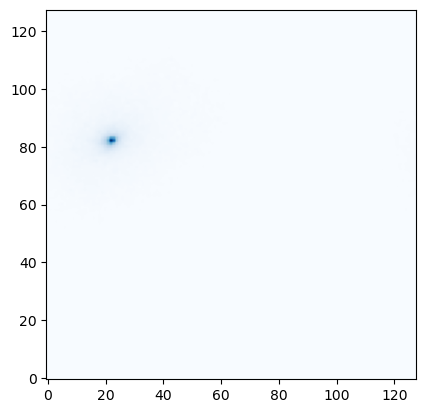

In [4]:
pos_f32 = pos + center #does not work with negative values, so centroid is added back
pos_f32 = pos_f32.astype(np.float32)

counts = np.zeros((grid_size,grid_size,grid_size), dtype=np.float32)
boxsize = np.float32(max_size) #boxsize = max_size (???)

pylians_MASL.MA(pos_f32, counts, boxsize, "CIC", verbose=True)

plt.imshow(counts.sum(axis=2), origin='lower', cmap='Blues')

print(np.max(counts), np.sum(counts), np.sum(hist), len(x))
